---
title: Tree-based Models
subtitle: NBC Shows; Boston Housing Markets
date: 2025-04-16
from: markdown+emoji
execute: 
  eval: false
---

# Libraries and Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
from sklearn.inspection import PartialDependenceDisplay, plot_partial_dependence

# NBC Data

In [ ]:
nbc = pd.read_csv("https://bcdanl.github.io/data/nbc_show.csv")
demog = pd.read_csv("https://bcdanl.github.io/data/nbc_demog.csv")

nbc

,Show,Network,PE,GRP,Genre,Duration
0,Living with Ed,HGTV,54.0000,151.0,Reality,30
1,Monarch Cove,LIFE,64.6479,375.5,Drama/Adventure,60
2,Top Chef,BRAVO,78.5980,808.5,Reality,60
3,Iron Chef America,FOOD,62.5703,17.3,Reality,30
4,Trading Spaces: All Stars,TLC,56.0000,44.1,Reality,60
5,Lisa Williams: Life Among the Dead,LIFE,56.2056,382.6,Reality,60
6,Project Runway,BRAVO,83.4243,826.2,Reality,60
7,Next,MTV,30.0000,7.5,Reality,30
8,House Hunters,HGTV,60.5455,320.8,Reality,30
9,My Super Sweet 16,MTV,47.9324,213.7,Reality,30


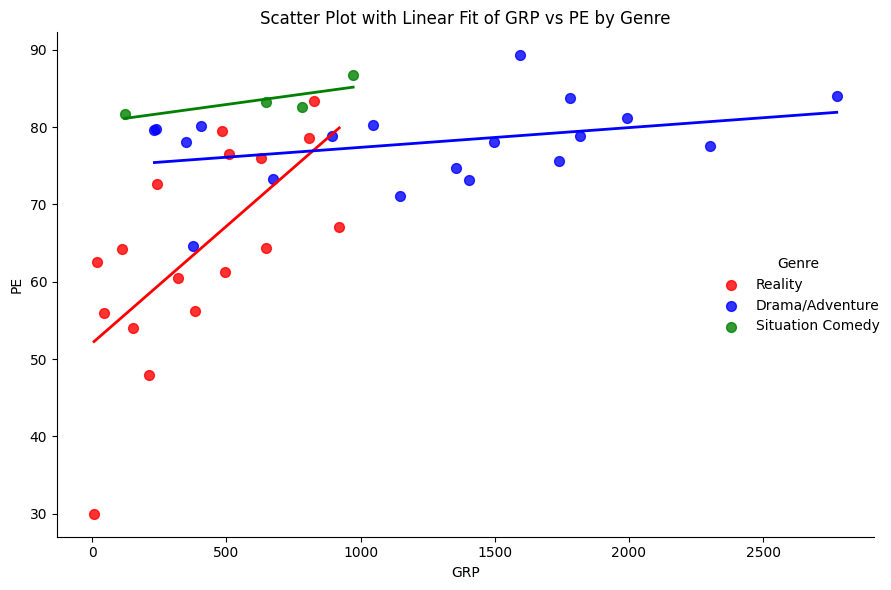

In [ ]:
# Define custom colors for each genre
custom_palette = {
    "Reality": "red",
    "Drama/Adventure": "blue",
    "Situation Comedy": "green"
}

# Plot
sns.lmplot(
    data=nbc, x="GRP", y="PE", hue="Genre",
    palette=custom_palette,
    ci=None, aspect=1.2, height=6,
    markers="o",
    scatter_kws={"s": 50},
    line_kws={"linewidth": 2}
)

plt.title("Scatter Plot with Linear Fit of GRP vs PE by Genre")
plt.xlabel("GRP")
plt.ylabel("PE")
plt.tight_layout()
plt.show()

In [ ]:
demog

,Show,TERRITORY.EAST.CENTRAL,TERRITORY.NORTHEAST,TERRITORY.PACIFIC,TERRITORY.SOUTHEAST,TERRITORY.SOUTHWEST,TERRITORY.WEST.CENTRAL,COUNTY.SIZE.A,COUNTY.SIZE.B,COUNTY.SIZE.C,...,FEMALE.HOH,INCOME.30.74K.,INCOME.75K.,HISPANIC.ORIGIN,NON.HISPANIC.ORIGIN,HOME.IS.OWNED,HOME.IS.RENTED,PC.NON.OWNER,PC.OWNER.WITH.INTERNET.ACCESS,PC.OWNER.WITHOUT.INTERNET.ACCESS
0,Living with Ed,6.1611,19.0758,28.7915,17.5355,7.7014,20.7346,48.6967,31.3981,13.3886,...,61.6114,31.0427,56.8720,9.5972,90.1659,76.8957,22.9858,12.5592,77.9621,9.3602
1,Monarch Cove,10.3289,14.0132,11.1184,37.1053,15.7237,11.6447,35.1316,32.2368,15.9211,...,61.3158,43.5526,20.4605,12.3026,87.6974,71.5132,28.6184,21.8421,62.9605,15.1974
2,Top Chef,7.5190,23.8271,19.6066,17.8652,14.1160,16.9637,48.2483,31.3255,13.3579,...,51.3829,39.0699,44.0484,11.1248,88.8547,65.7242,34.2348,13.5218,80.1475,6.3716
3,Iron Chef America,12.8118,25.1617,21.7123,20.1879,10.5482,9.6397,46.9664,30.3819,12.5038,...,48.7989,44.3640,44.6104,8.7003,91.2997,74.8075,25.1925,8.6849,84.7244,6.5445
4,Trading Spaces: All Stars,11.9926,15.1292,17.1587,16.7897,16.2362,22.6937,28.5978,37.6384,16.7897,...,58.1181,37.2694,47.0480,9.9631,90.2214,75.0923,24.9077,11.9926,85.9779,2.0295
5,Lisa Williams: Life Among the Dead,17.3210,23.3256,9.4688,26.5589,13.3949,9.9307,37.1824,23.5566,20.5543,...,63.9723,44.5727,24.9423,7.8522,92.1478,69.2841,30.7159,26.3279,64.8961,8.7760
6,Project Runway,10.7261,21.5272,20.2820,20.1620,14.7165,12.5563,50.0000,32.9133,12.6613,...,54.1704,38.9439,45.4845,9.1509,90.8791,66.0966,33.9034,7.2607,85.4185,7.3207
7,Next,11.6279,27.8013,15.8562,22.4101,11.6279,10.6765,48.3087,22.3044,13.5307,...,52.2199,39.8520,26.5328,19.5560,80.3383,53.3827,46.5116,13.4249,71.7759,14.7992
8,House Hunters,14.9860,22.4790,12.0448,22.8992,12.2549,15.2661,39.7759,30.6723,14.0056,...,52.1709,42.6471,47.4790,7.8431,92.0868,80.8824,19.1176,7.2129,84.1737,8.6134
9,My Super Sweet 16,11.6120,22.5410,16.8033,25.4098,11.4754,12.0219,41.3934,30.6011,13.1148,...,54.3716,43.5792,29.7814,15.8470,84.1530,53.9617,45.9016,13.5246,72.9508,13.3880


In [ ]:
demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Show                              40 non-null     object 
 1   TERRITORY.EAST.CENTRAL            40 non-null     float64
 2   TERRITORY.NORTHEAST               40 non-null     float64
 3   TERRITORY.PACIFIC                 40 non-null     float64
 4   TERRITORY.SOUTHEAST               40 non-null     float64
 5   TERRITORY.SOUTHWEST               40 non-null     float64
 6   TERRITORY.WEST.CENTRAL            40 non-null     float64
 7   COUNTY.SIZE.A                     40 non-null     float64
 8   COUNTY.SIZE.B                     40 non-null     float64
 9   COUNTY.SIZE.C                     40 non-null     float64
 10  COUNTY.SIZE.D                     40 non-null     float64
 11  WIRED.CABLE.W.PAY                 40 non-null     float64
 12  WIRED.CABL

# Decision Tree

## Classification Tree

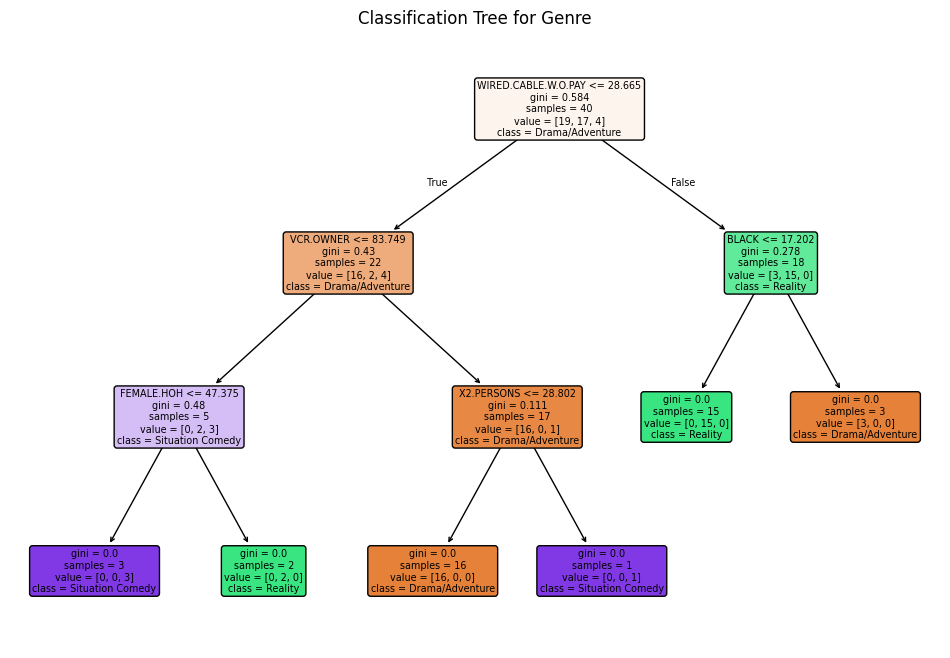

In [ ]:
# Use the demographic variables (excluding the first column) as features
X = demog.iloc[:, 1:]
y = nbc["Genre"]

# Build the classification tree.
# The 'mincut = 1' in R is analogous to a very low min_samples_split in scikit-learn (default=2).
clf = DecisionTreeClassifier(min_samples_split=2, random_state=42)
clf.fit(X, y)

# Generate predictions for the 'Genre' and store them in the nbc DataFrame
nbc["genrepred"] = clf.predict(X)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.title("Classification Tree for Genre")
plt.show()

## Regression Tree

In [ ]:
# Prepare the predictor set and target variable.
# We want to model: PE ~ Genre + GRP using all columns except the first.
# Here, we select the 'Genre' and 'GRP' columns as predictors and 'PE' as the target.
X = nbc[['Genre', 'GRP']]
y = nbc['PE']

# If 'Genre' is categorical, convert it to dummy variables.
# This is necessary because scikit-learn models require numerical inputs.
X = pd.get_dummies(X, columns=['Genre'], drop_first=True)

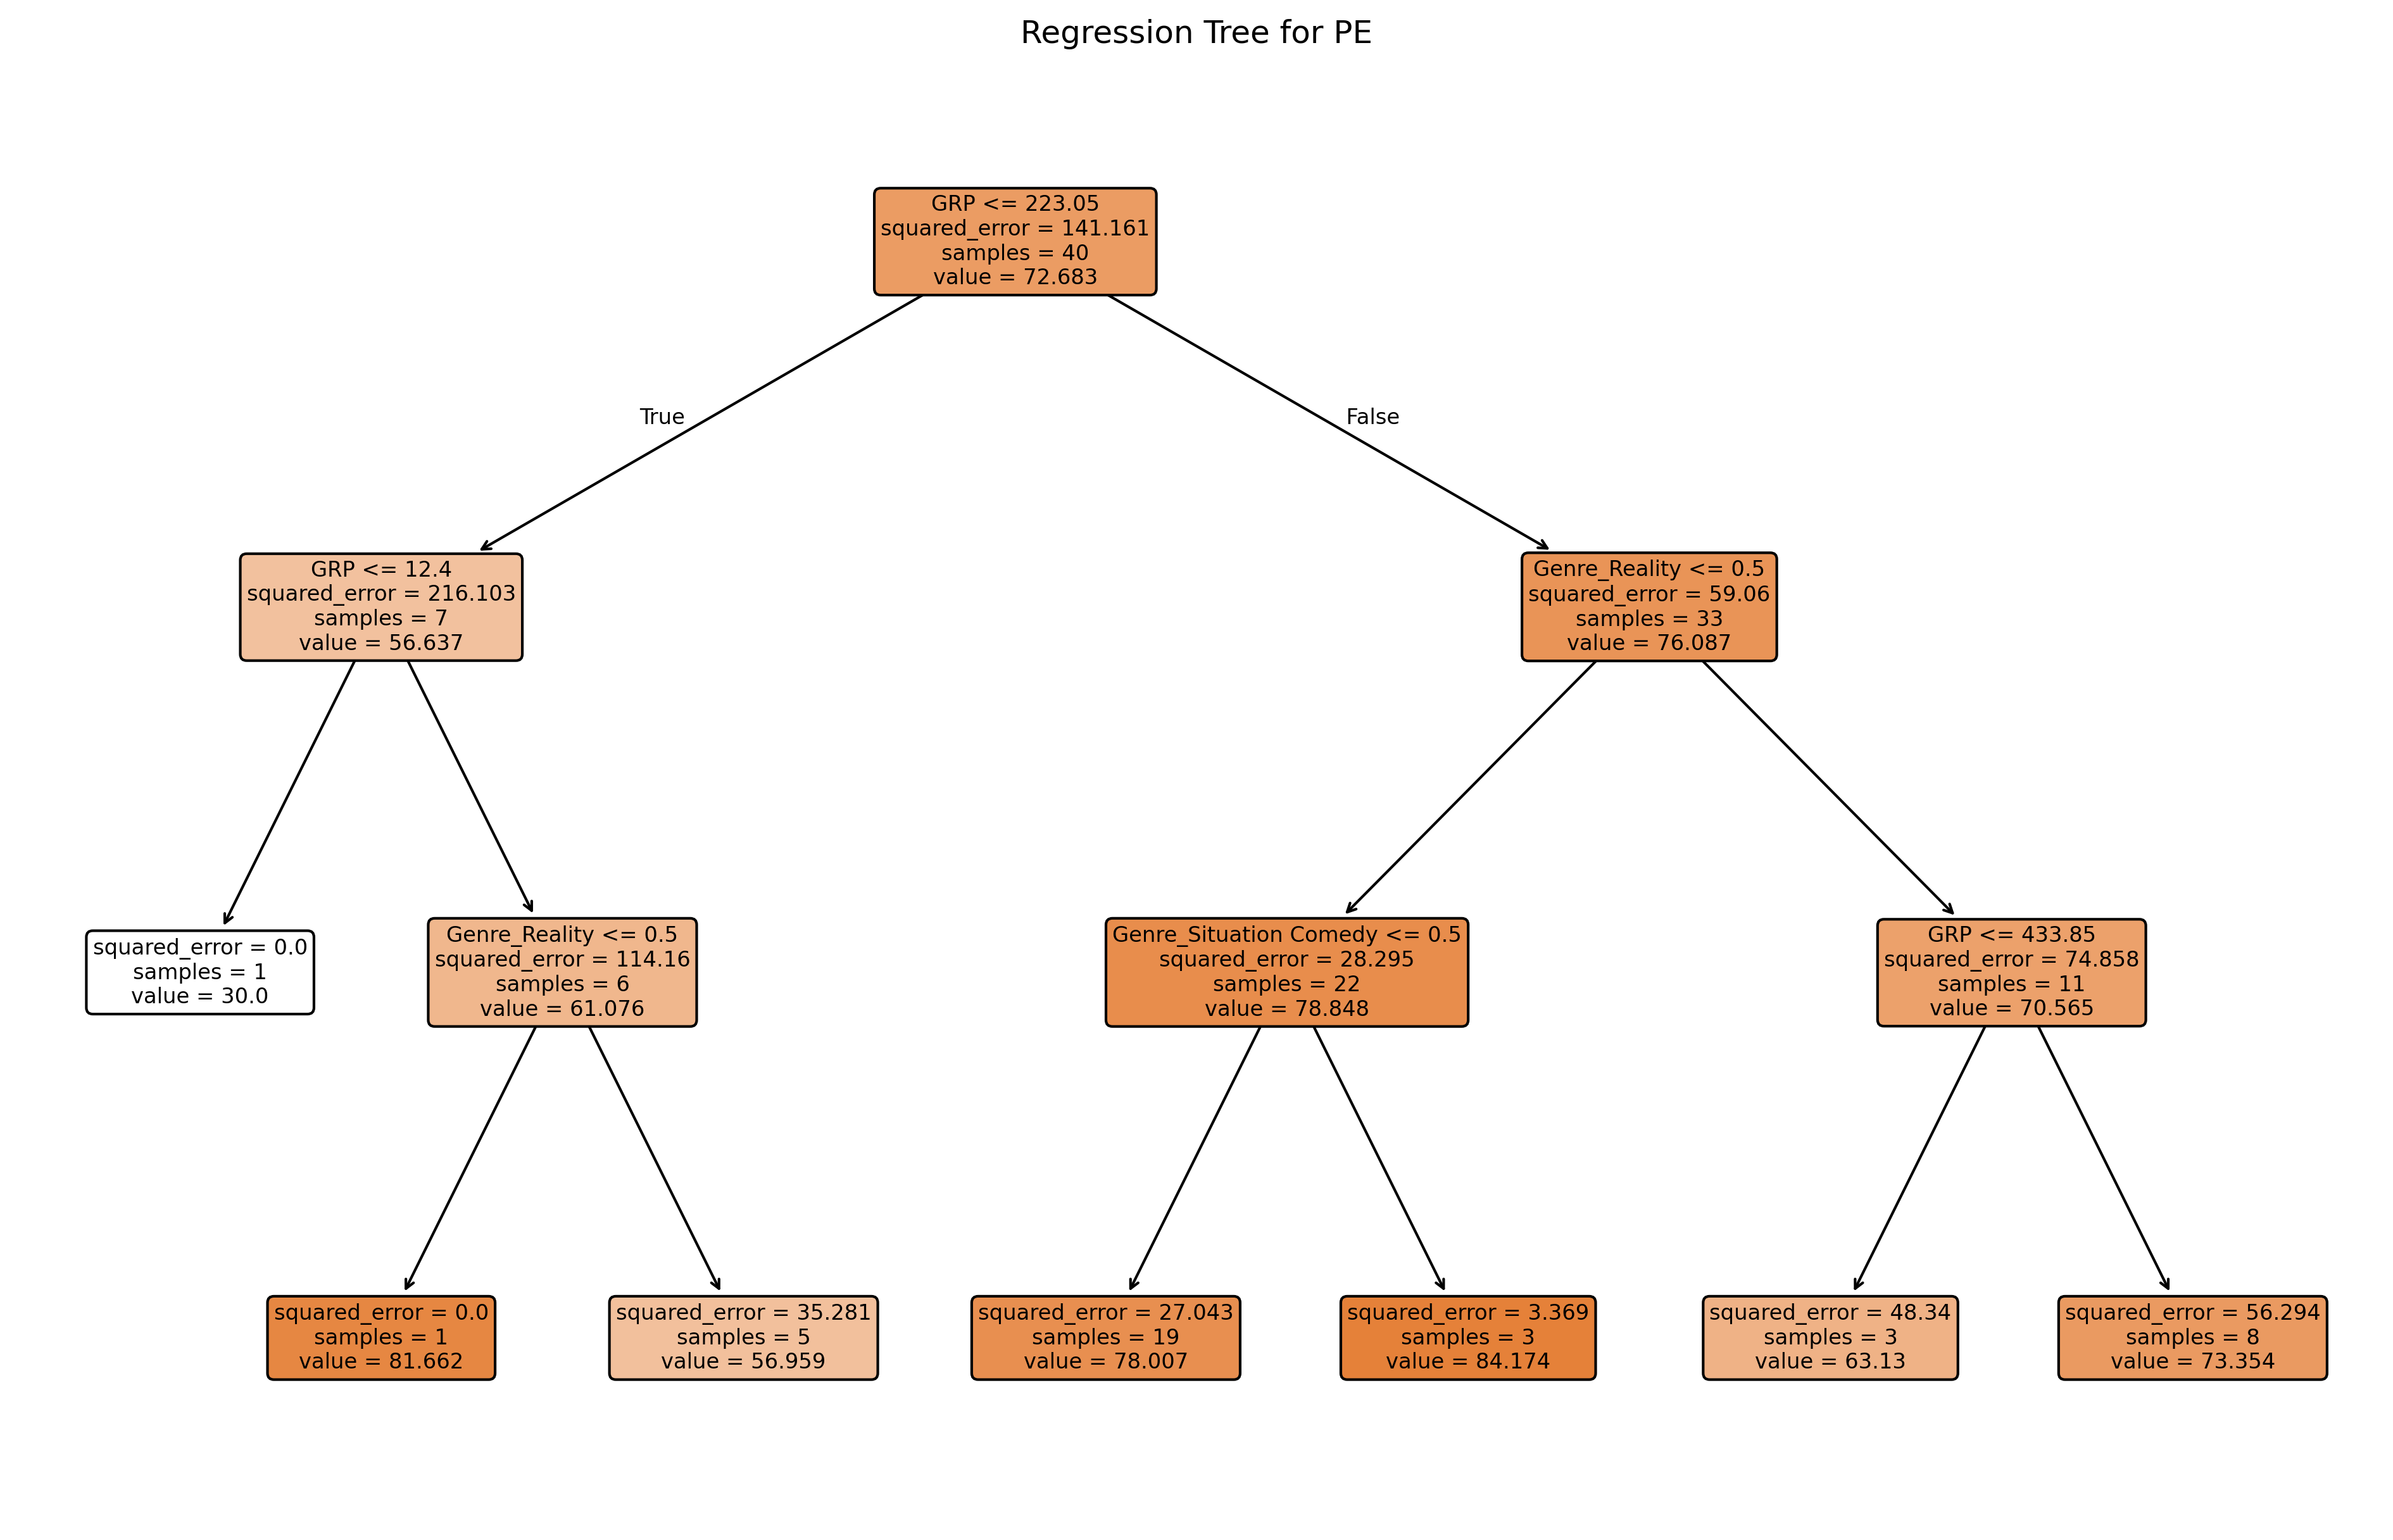

In [ ]:
# Build and fit the regression tree.
reg_tree = DecisionTreeRegressor(max_depth=3, min_samples_split=2, random_state=42)
reg_tree.fit(X, y)

# Generate predictions for PE and store them in the DataFrame.
nbc['PEpred'] = reg_tree.predict(X)

# Plot the regression tree.
plt.figure(figsize=(16, 10), dpi = 300)
plot_tree(reg_tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Regression Tree for PE")
plt.show()

# Boston Housing Data

In [ ]:
# -------------------------------
# Data Loading and Visualization
# -------------------------------

# Load the Boston (demographics) data from URL.
boston = pd.read_csv("https://bcdanl.github.io/data/boston.csv")
boston

# boston_vis = boston.melt(id_vars=["medv"], var_name="var", value_name="value")
# Exclude the 'chas' variable from visualizations
# boston_vis = boston_vis[boston_vis['var'] != "chas"]

# Scatter plots with smoothing (using lowess)
# sns.lmplot(data=boston_vis, x="value", y="medv", col="var",
           # col_wrap=3, height=4, scatter_kws={"s":10}, lowess=True)
# plt.show()

# Boxplot for each variable
# sns.catplot(data=boston_vis, y="value", col="var", kind="box", col_wrap=3)
# plt.show()

# Histogram for each variable
# g = sns.FacetGrid(boston_vis, col="var", col_wrap=3, height=4)
# g.map(plt.hist, "value", bins=20)
# plt.show()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


- crim
  - per capita crime rate by town.

- zn
  - proportion of residential land zoned for lots over 25,000 sq.ft.

- indus
  - proportion of non-retail business acres per town.

- chas
  - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

- nox
  - nitrogen oxides concentration (parts per 10 million).

- rm
  - average number of rooms per dwelling.

- age
  - proportion of owner-occupied units built prior to 1940.

- dis
  - weighted mean of distances to five Boston employment centres.

- rad
  - index of accessibility to radial highways.

- tax
  - full-value property-tax rate per $10,000.

- ptratio
  - pupil-teacher ratio by town.

- black
  - $1000\times (Bk - 0.63)^2$, where $Bk$ is the proportion of blacks by town.

- lstat
  - lower socioeconomic status of the population (percent).

- medv
  - median value of owner-occupied homes in $1000s.

## Splitting Data into Training and Testing

In [ ]:
# Set a random seed for reproducibility (like R's set.seed)
np.random.seed(42120532)
train, test = train_test_split(boston, test_size=0.20, random_state=42120532)

X_train = train.drop(columns=["medv"])
y_train = train["medv"]

X_test = test.drop(columns=["medv"])
y_test = test["medv"]

# Prunning

## Build the Regression Tree on the Training Data

Training MSE: 0.250
Test MSE: 13.859


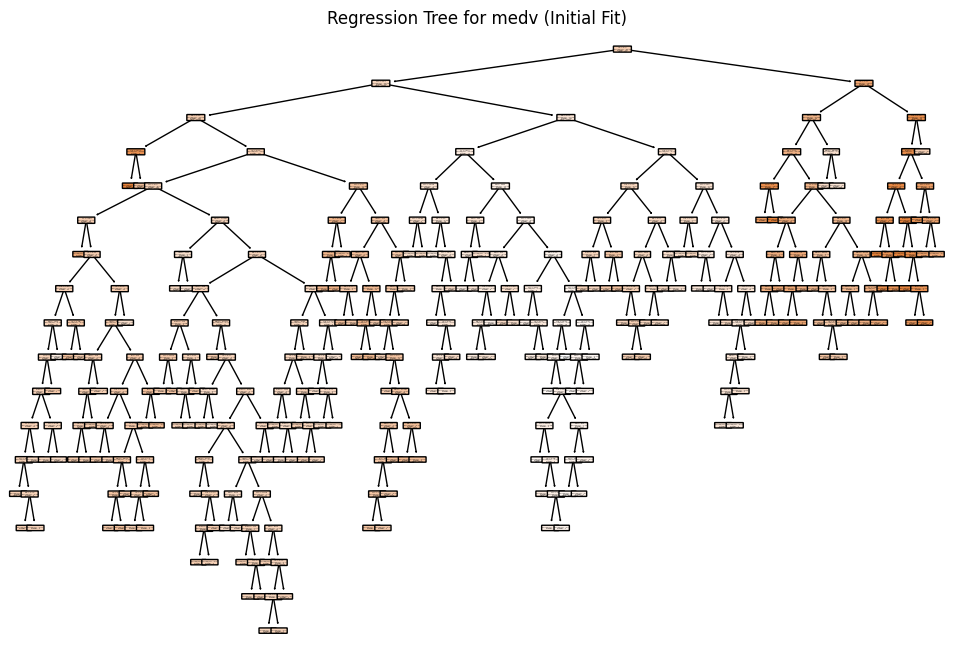

In [ ]:
# In scikit-learn, we can use min_impurity_decrease=0.005 for a similar effect.
tree_model = DecisionTreeRegressor(min_impurity_decrease=0.005, random_state=42)
# Fit the model using all predictors (all columns except 'medv')
tree_model.fit(X_train, y_train)


# Predict on training and test sets
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the results
print(f"Training MSE: {mse_train:.3f}")
print(f"Test MSE: {mse_test:.3f}")

# Plot the initial regression tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Regression Tree for medv (Initial Fit)")
plt.show()


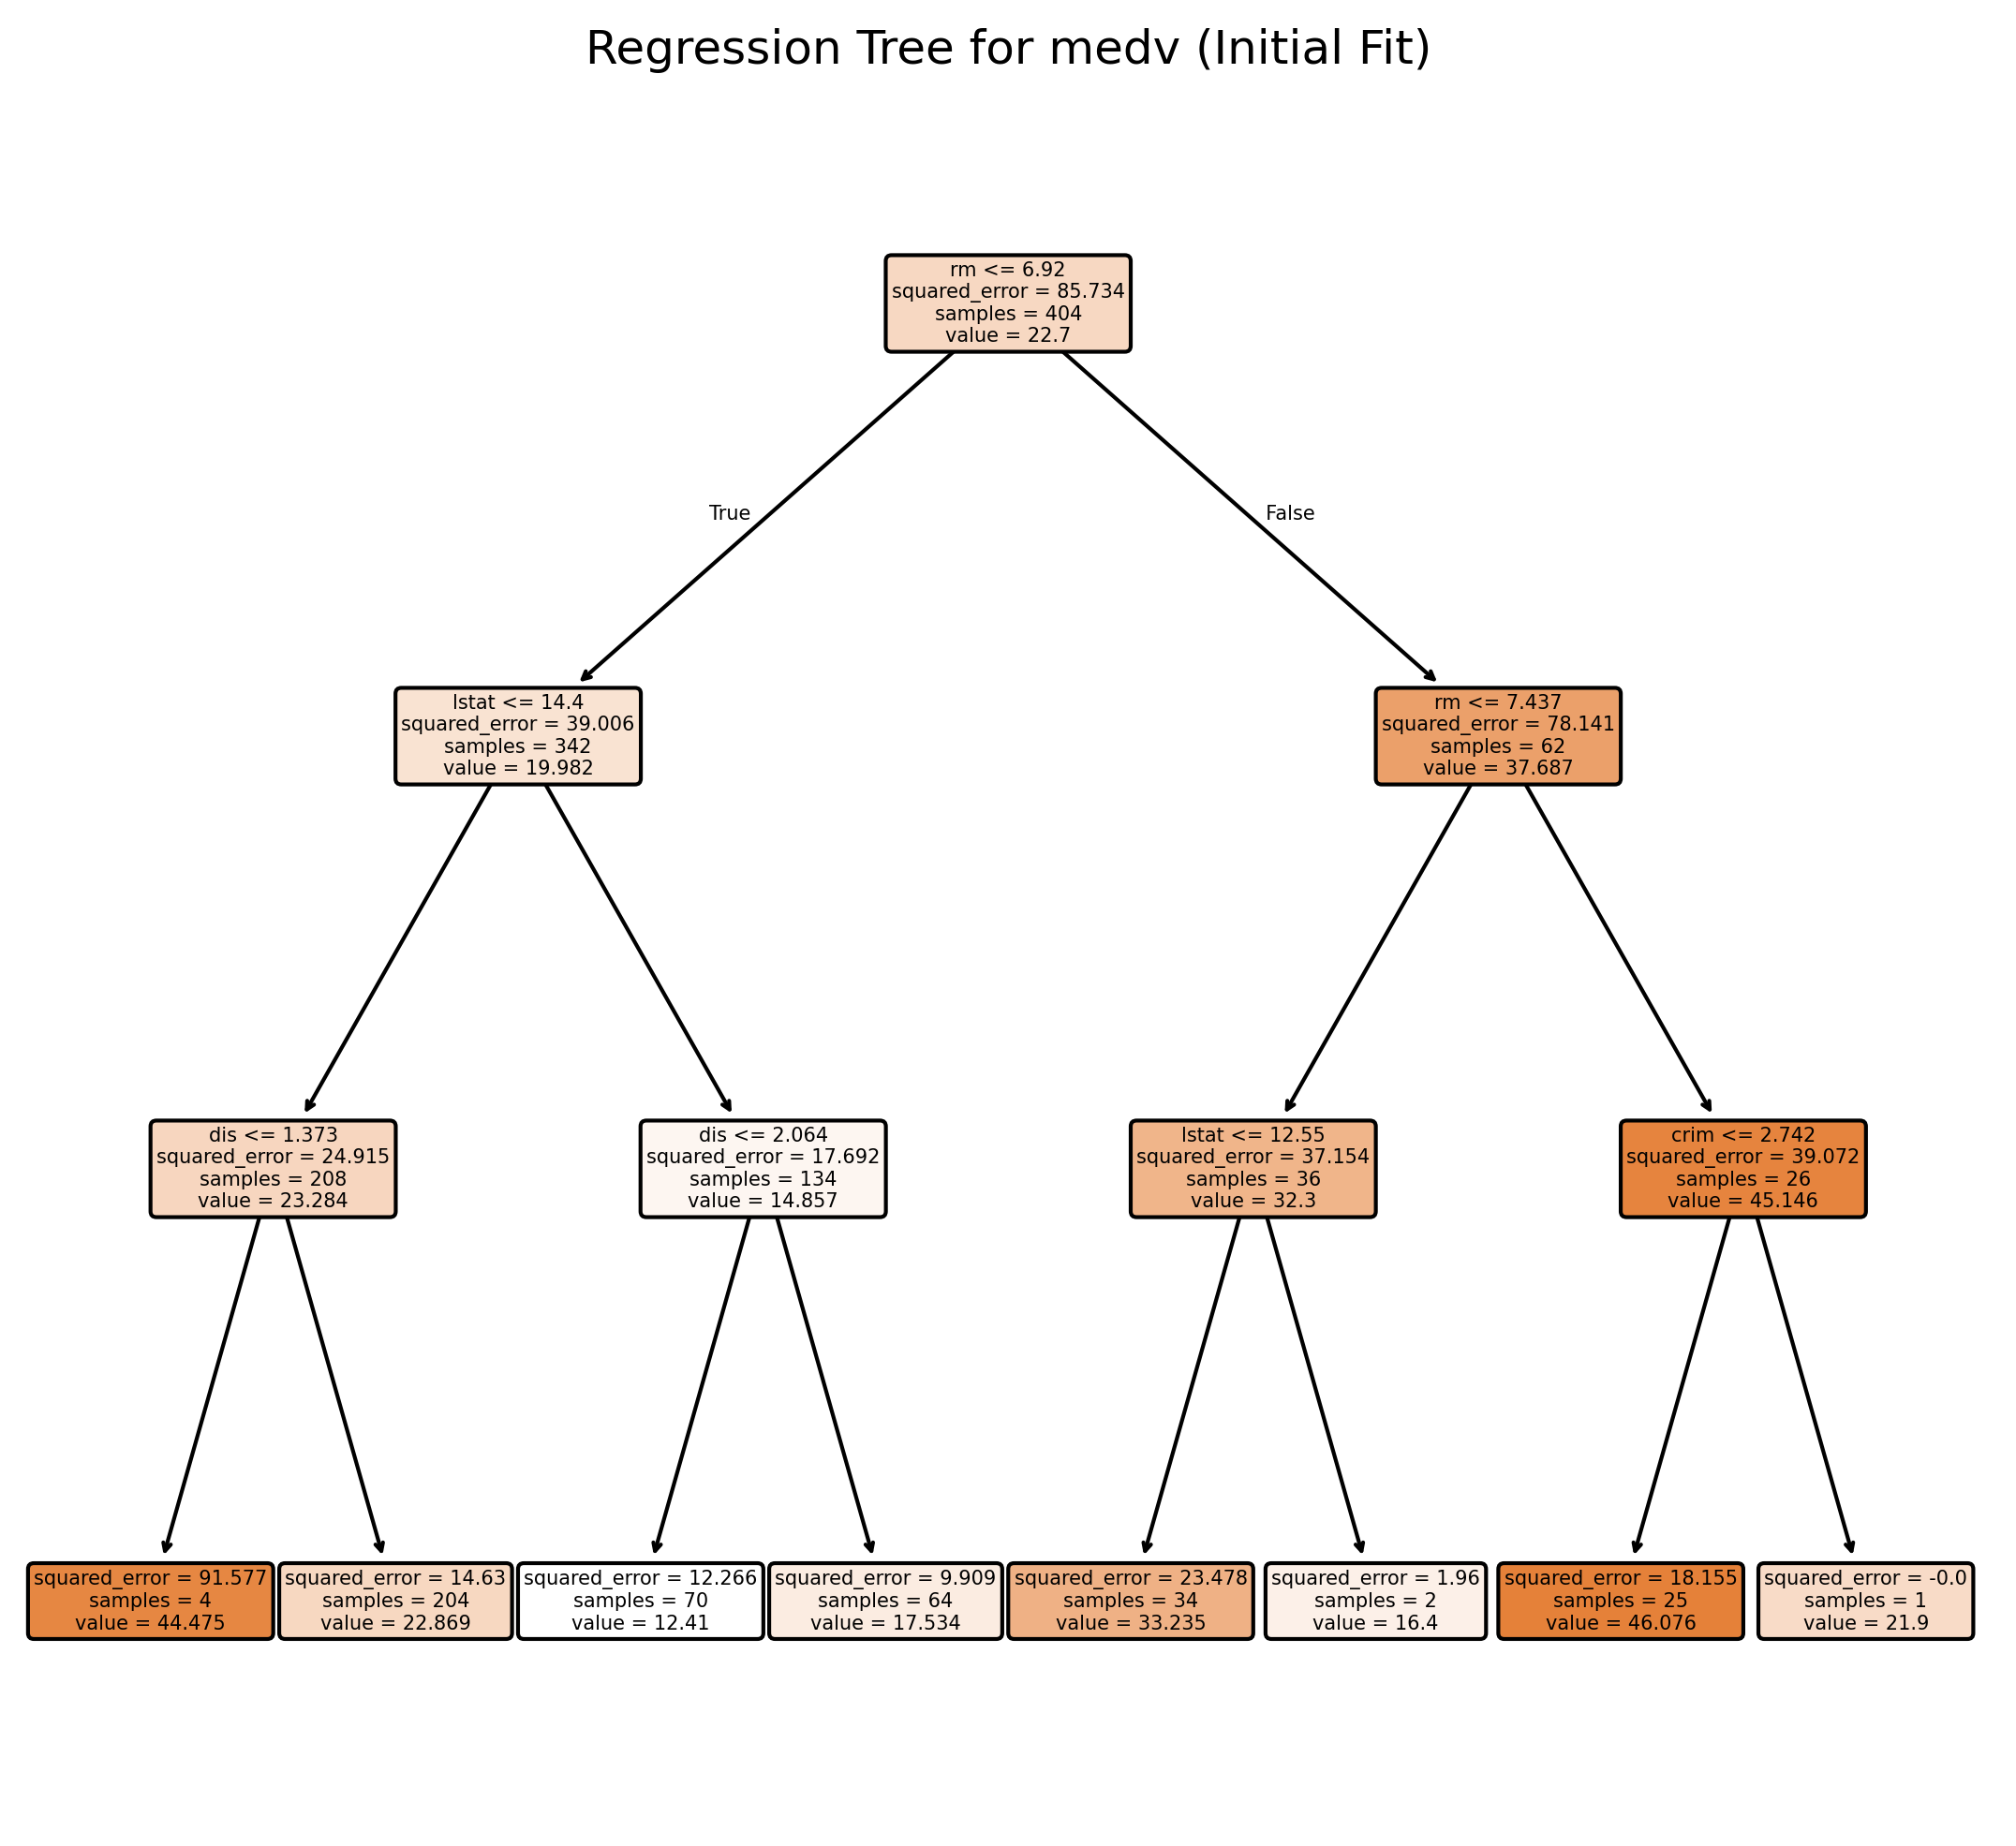

In [ ]:
# In scikit-learn, we can use min_impurity_decrease=0.005 for a similar effect.
tree_model = DecisionTreeRegressor(max_depth=3, min_impurity_decrease=0.005, random_state=42)
# Fit the model using all predictors (all columns except 'medv')
tree_model.fit(X_train, y_train)

# Plot the initial regression tree
plt.figure(figsize=(9, 8), dpi = 300)
plot_tree(tree_model, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Regression Tree for medv (Initial Fit)")
plt.show()


## Cross-Validation and Cost Complexity Pruning (CV Tree)

In [ ]:
# Obtain the cost-complexity pruning path from the initial tree
path = tree_model.cost_complexity_pruning_path(X_train, y_train)  # Get candidate ccp_alpha values and corresponding impurities
ccp_alphas = path.ccp_alphas  # Candidate pruning parameters (alpha values)
impurities = path.impurities  # Impurity values at each candidate alpha

# Exclude the maximum alpha value to avoid the trivial tree (a tree with only the root)
ccp_alphas = ccp_alphas[:-1]  # Remove the last alpha value which would prune the tree to a single node

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Initialize 10-fold CV with shuffling and fixed random state
cv_scores = []  # List to store mean cross-validated scores (negative MSE)
leaf_nodes = []  # List to record the number of leaves for each pruned tree
sse = []         # List to record the sum of squared errors (SSE) on the training set

# Loop over each candidate alpha value to evaluate its performance
for ccp_alpha in ccp_alphas:
    # Create a DecisionTreeRegressor with the current ccp_alpha and other specified parameters
    clf = DecisionTreeRegressor(random_state=42,
                                ccp_alpha=ccp_alpha,
                                min_impurity_decrease=0.005)

    # Perform 10-fold cross-validation and compute negative mean squared error (MSE)
    scores = cross_val_score(clf, X_train, y_train,
                             cv=kf, scoring="neg_mean_squared_error")
    cv_scores.append(np.mean(scores))  # Append the mean CV score for the current alpha

    # Fit the tree on the training data to record additional metrics
    clf.fit(X_train, y_train)
    leaf_nodes.append(clf.get_n_leaves())  # Record the number of leaf nodes in the tree

    # Compute SSE (sum of squared errors) on the training set
    preds = clf.predict(X_train)  # Predict target values on training data
    sse.append(np.sum((y_train - preds) ** 2))  # Calculate and record SSE for training set


# Select the best alpha based on the highest (least negative) mean CV score
best_alpha = ccp_alphas[np.argmax(cv_scores)]  # Identify the alpha with the best CV performance
print("Best alpha:", best_alpha)  # Print the best alpha value

# Train the final pruned tree using the best alpha found
final_tree = DecisionTreeRegressor(random_state=42,
                                   ccp_alpha=best_alpha,
                                   min_impurity_decrease=0.005)
final_tree.fit(X_train, y_train)  # Fit the final model on the training data

Best alpha: 0.2329619817674513


DecisionTreeRegressor(ccp_alpha=np.float64(0.2329619817674513),
                      min_impurity_decrease=0.005, random_state=42)

In [ ]:
len(ccp_alphas)

146

## Evaluate the Final Tree on the Test Data


In [ ]:
preds = final_tree.predict(test.drop(columns=["medv"]))
mse = mean_squared_error(y_test, preds)
print("Test MSE:", mse)

Test MSE: 12.755442672992647


## Prunned Tree

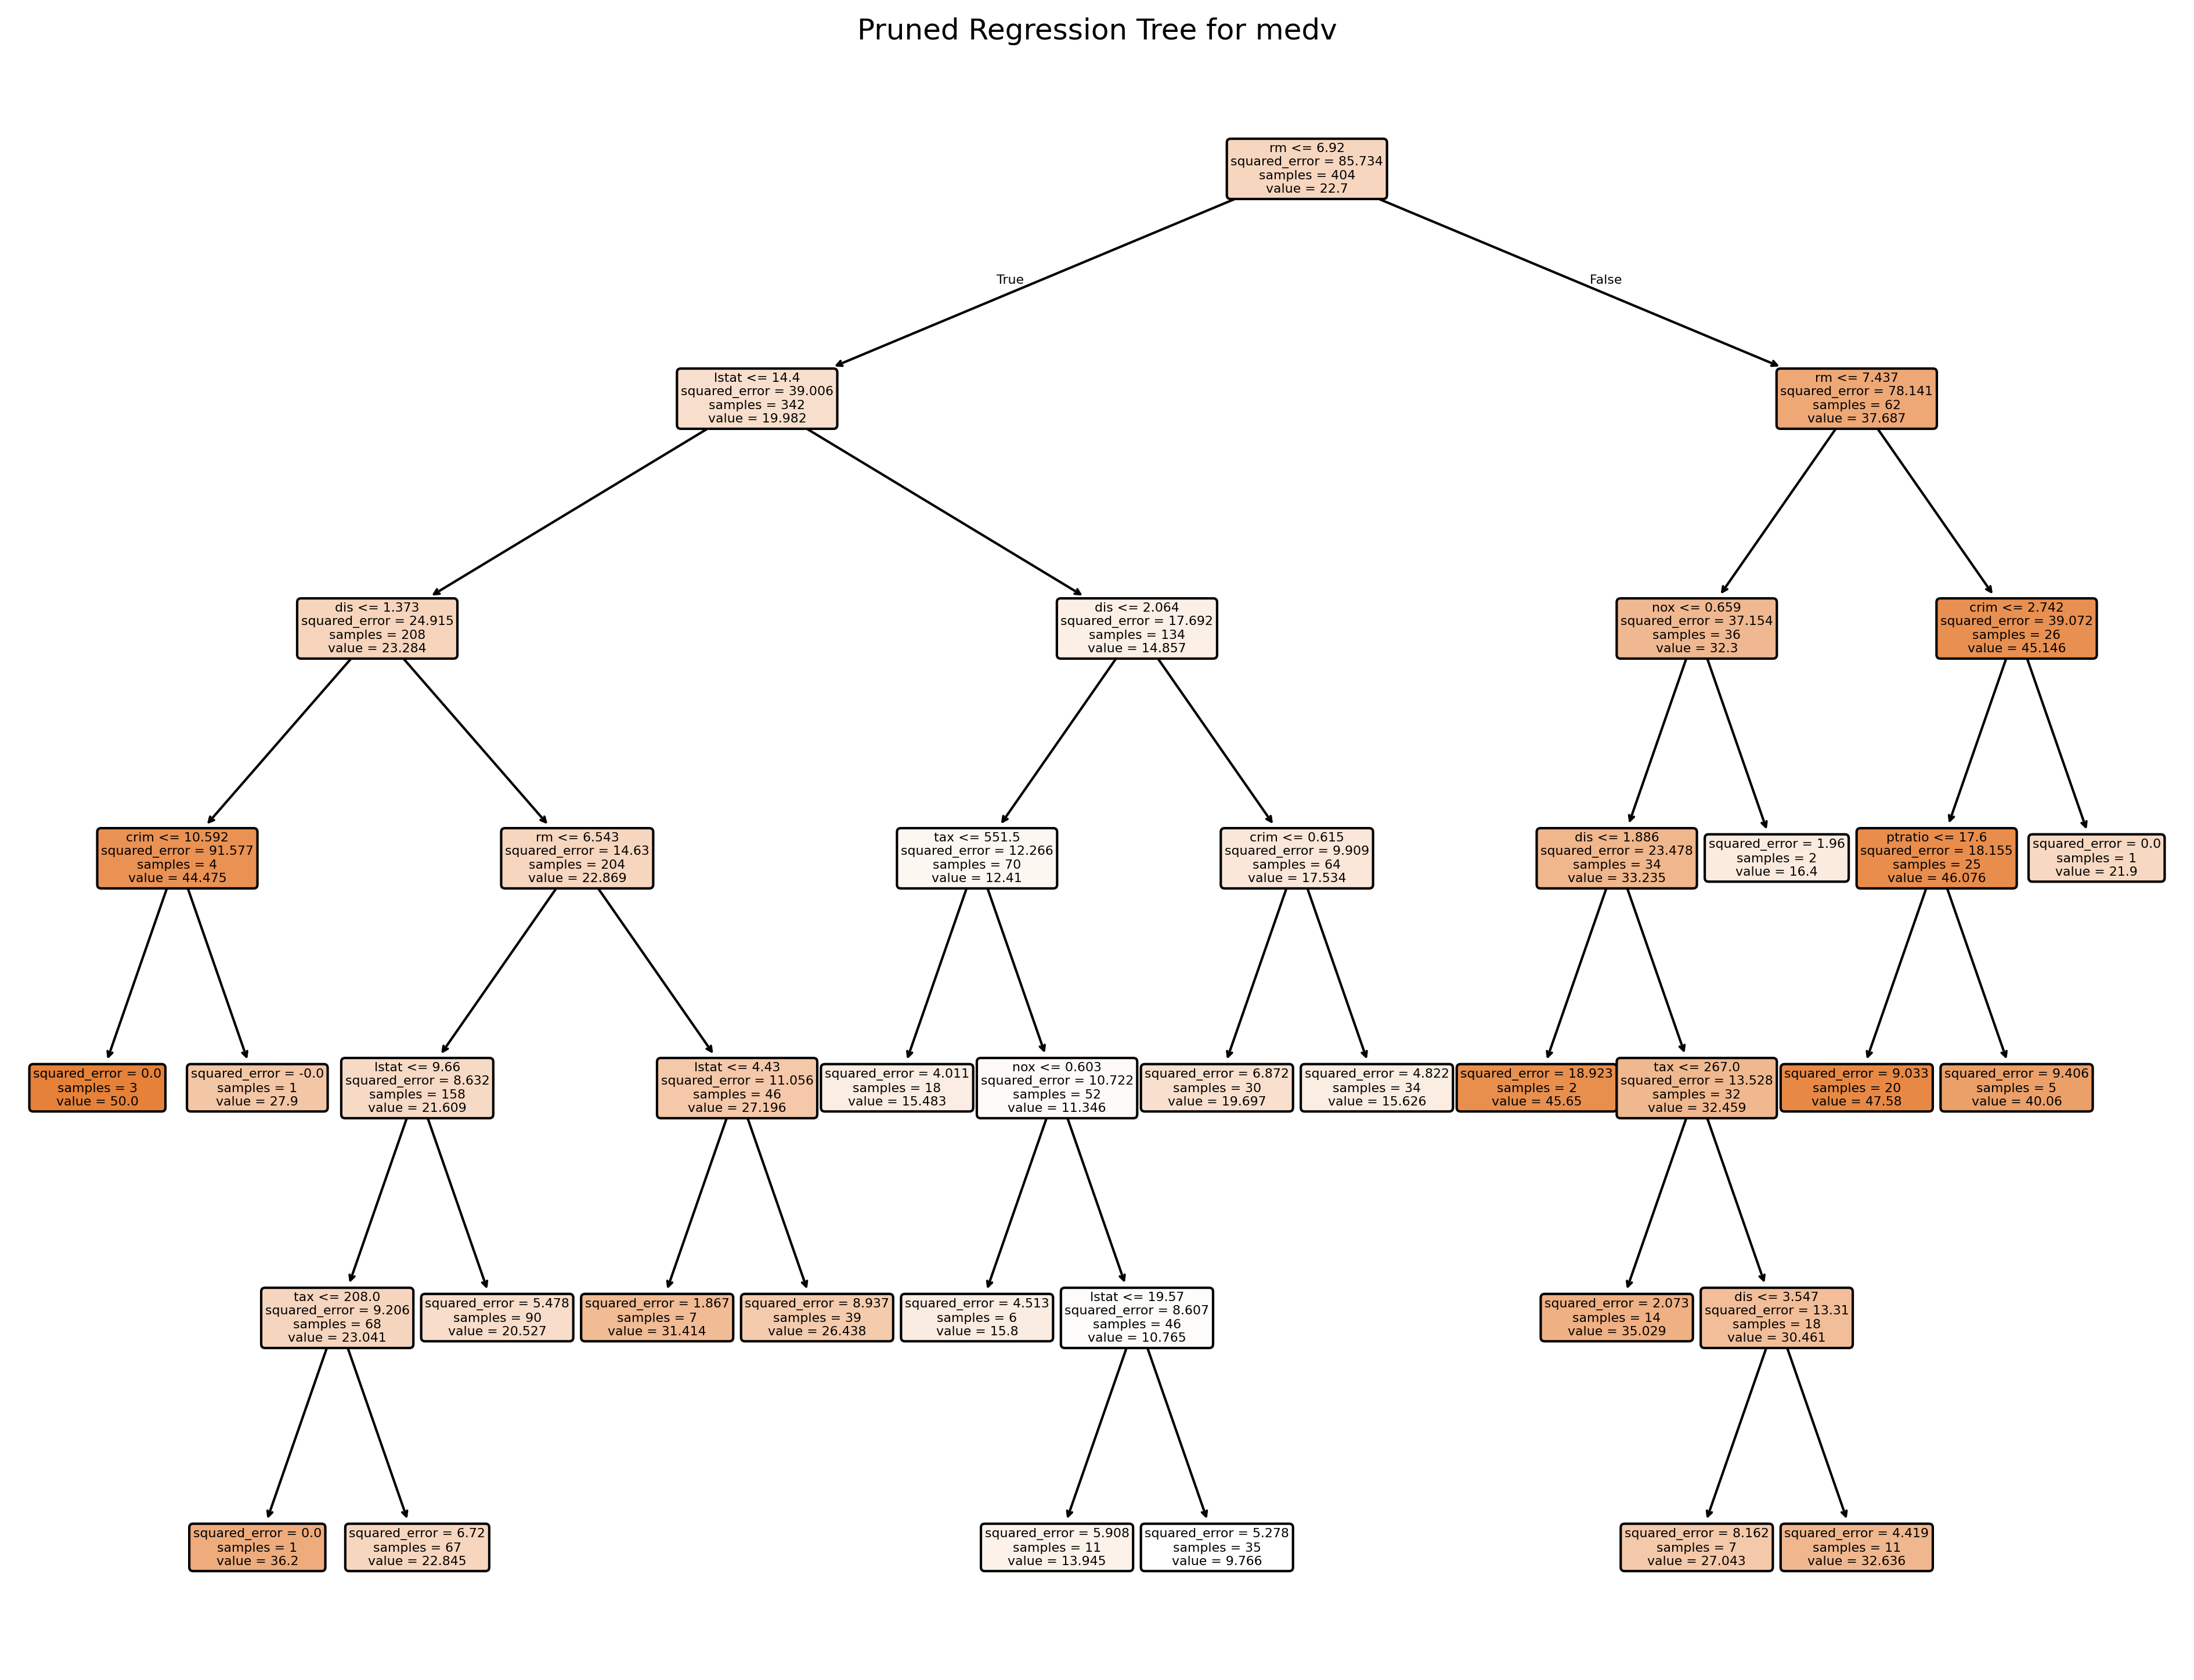

Number of leaves in the pruned tree: 21
Tree depth: 6


In [ ]:
# Plot the pruned tree.
plt.figure(figsize=(16, 12), dpi=300)
plot_tree(final_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Pruned Regression Tree for medv")
plt.show()

# Summary of the final tree
print("Number of leaves in the pruned tree:", final_tree.get_n_leaves())
print("Tree depth:", final_tree.get_depth())


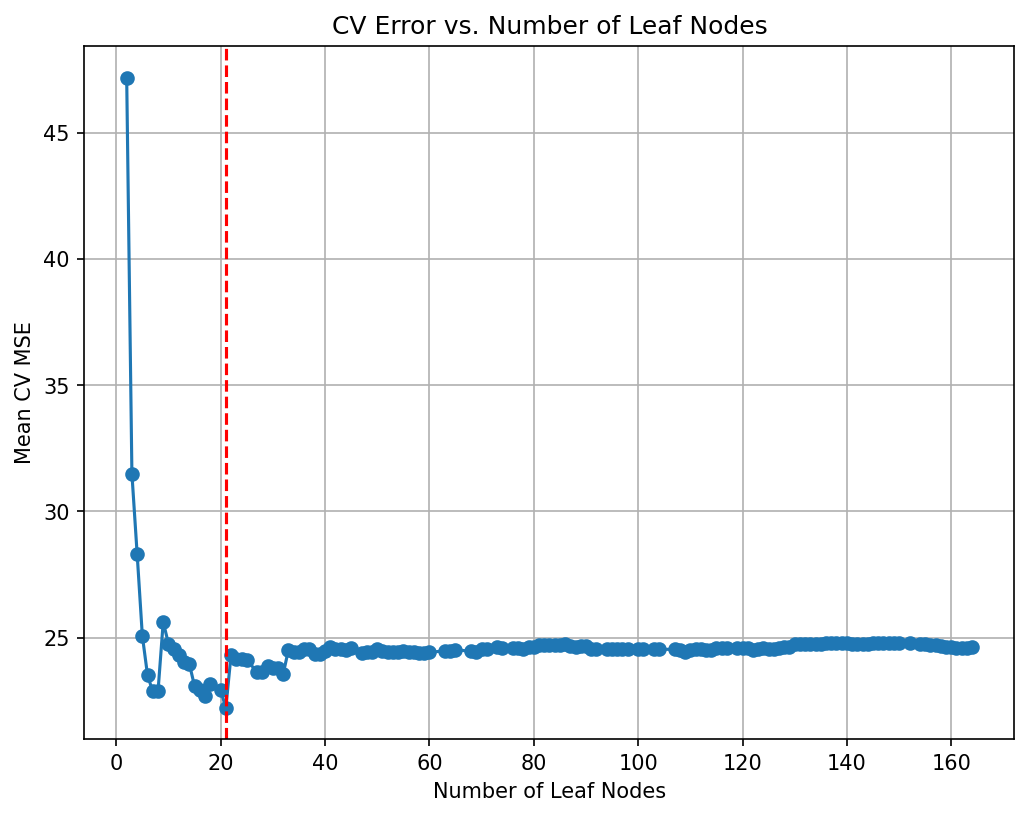

In [ ]:
# Plot the average cross-validated MSE against the number of leaf nodes
negative_cv_scores = -np.array(cv_scores)

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(leaf_nodes, negative_cv_scores, marker='o', linestyle='-')
plt.axvline(x=final_tree.get_n_leaves(), color='red', linestyle='--', label='Leaf Nodes = 21')  # Add vertical line at 21 leaf nodes
plt.xlabel("Number of Leaf Nodes")
plt.ylabel("Mean CV MSE")
plt.title("CV Error vs. Number of Leaf Nodes")
plt.grid(True)
plt.show()

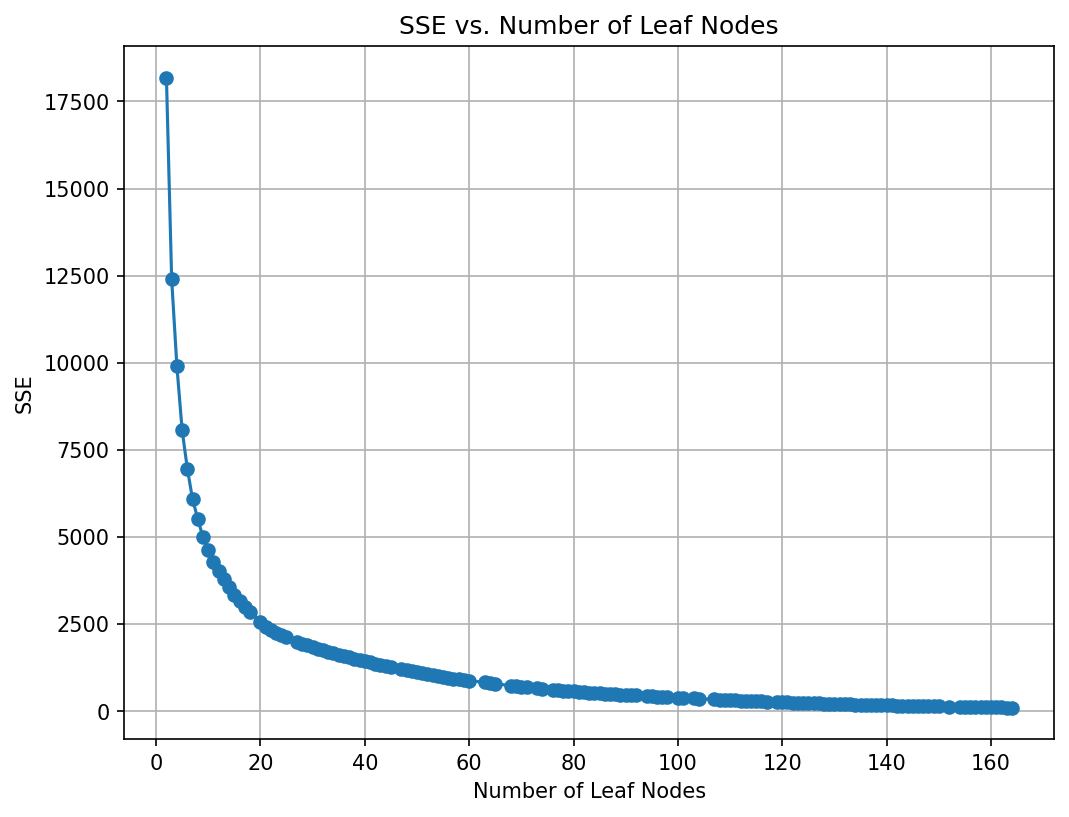

In [ ]:
# Plot the SSE on the training against the number of leaf nodes
plt.figure(figsize=(8, 6), dpi=150)
plt.plot(leaf_nodes, sse, marker='o', linestyle='-')
plt.xlabel("Number of Leaf Nodes")
plt.ylabel("SSE")
plt.title("SSE vs. Number of Leaf Nodes")
plt.grid(True)
plt.show()

# Random Forest

In [ ]:
# Suppose df is your dataset and 'medv' is the response variable.
# Split into training and testing sets (similar to the R code)
X = boston.drop(columns=["medv"])   # All predictors
y = boston["medv"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Build the Random Forest model
# max_features=13 means that at each split the algorithm randomly considers 13 predictors.
rf = RandomForestRegressor(max_features=5,  # Use 13 features at each split
                           n_estimators=500,  # Number of trees in the forest
                           random_state=42,
                           oob_score=True)    # Use out-of-bag samples to estimate error
rf.fit(X_train, y_train)


# Print the model details
print("Random Forest Model:")
print(rf)

# Output the model details (feature importances, OOB score, etc.)
print("Out-of-bag score:", rf.oob_score_)  # A rough estimate of generalization error


# Generate predictions on training and testing sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate Mean Squared Errors (MSE) for both sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

# Optional: Plot predicted vs. observed values for test data
# plt.figure(figsize=(8,6), dpi=300)
# plt.scatter(y_test, y_test_pred, alpha=0.7)
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
# plt.xlabel("Observed medv")
# plt.ylabel("Predicted medv")
# plt.title("Random Forest: Observed vs. Predicted Values")
# plt.show()

Random Forest Model:
RandomForestRegressor(max_features=5, n_estimators=500, oob_score=True,
                      random_state=42)
Out-of-bag score: 0.864624851178444
Train MSE: 1.586040475049504
Test MSE: 9.365789512941221


Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Parameters: {'max_features': 7, 'min_samples_leaf': 5}


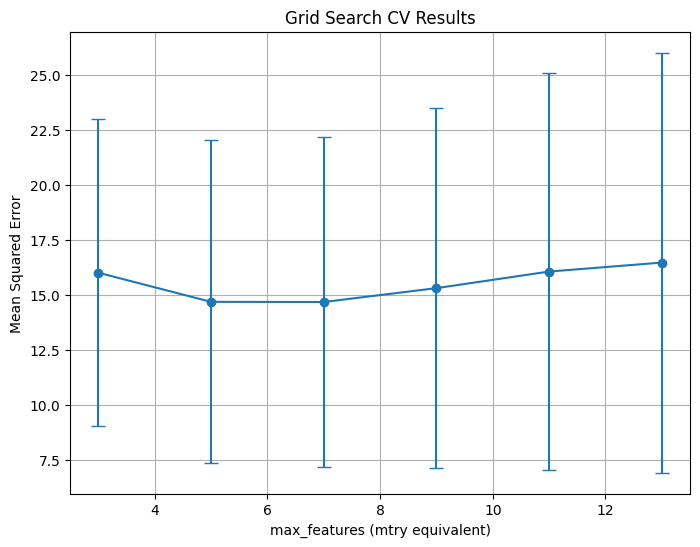

In [ ]:
# Define the grid of hyperparameters:
# - min_samples_leaf is the minimum number of samples in a terminal node.
param_grid = {
    "max_features": list(range(3, 15, 2)),
    "min_samples_leaf": [5]
}

# Initialize the RandomForestRegressor:
# - n_estimators is set to 50 (equivalent to num.trees)
# - random_state is set for reproducibility.
# rf = RandomForestRegressor(n_estimators=50, random_state=1917)

rf = RandomForestRegressor(n_estimators=500,  # Number of trees in the forest
                           random_state=42,
                           oob_score=True)    # Use out-of-bag samples to estimate error

# Set up 10-fold cross-validation and GridSearch over the parameters
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search on the data
grid_search.fit(X_train, y_train)

# Extract the best parameters
print("Best Parameters:", grid_search.best_params_)

# To replicate the ggplot visualization from R, we plot the grid search results.
results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(8, 6))
plt.errorbar(
    results["param_max_features"].astype(int),
    -results["mean_test_score"],
    yerr=results["std_test_score"],
    fmt="o-",
    capsize=5
)
plt.title("Grid Search CV Results")
plt.xlabel("max_features (mtry equivalent)")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()



## Variable Importance

Variable Importances:
crim: 0.0609
zn: 0.0039
indus: 0.0468
chas: 0.0063
nox: 0.0549
rm: 0.3493
age: 0.0236
dis: 0.0560
rad: 0.0080
tax: 0.0266
ptratio: 0.0569
black: 0.0177
lstat: 0.2892


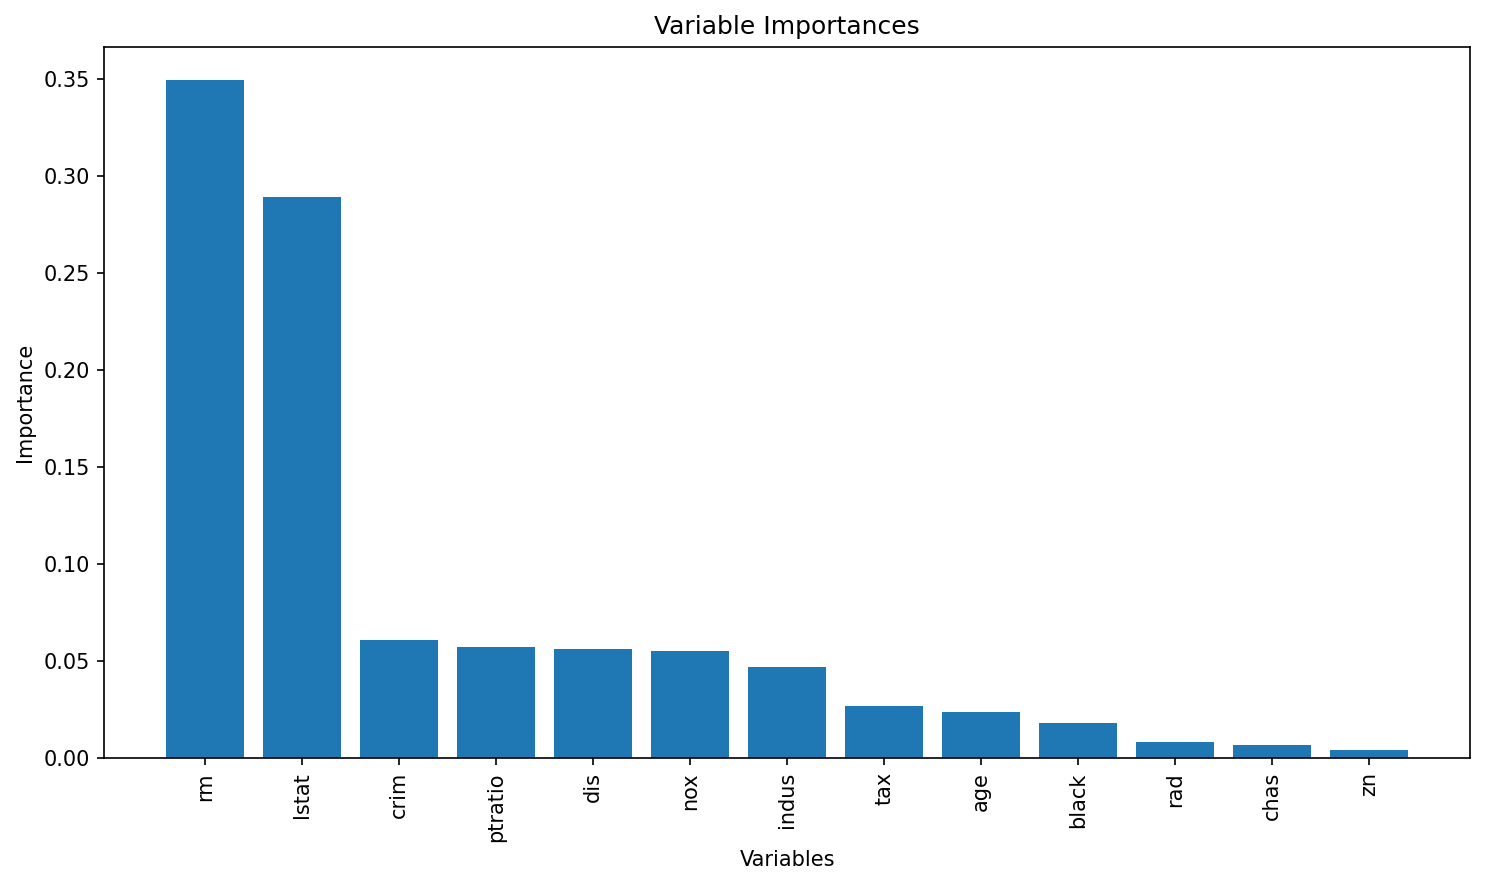

In [ ]:
# Get feature importances from the model (equivalent to importance(bag.boston) in R)
importances = rf.feature_importances_
feature_names = X_train.columns

print("Variable Importances:")
for name, imp in zip(feature_names, importances):
    print(f"{name}: {imp:.4f}")

# Plot the feature importances, similar to varImpPlot(bag.boston) in R
# Sort the features by importance for a nicer plot.
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6), dpi=150)
plt.title("Variable Importances")
plt.bar(range(len(feature_names)), importances[indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
PartialDependenceDisplay.from_estimator(rf, X_train, ['rm'], kind='both')

NameError: name 'PartialDependenceDisplay' is not defined

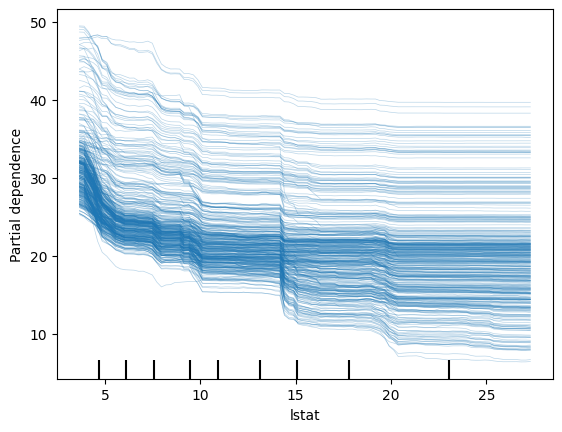

In [ ]:
PartialDependenceDisplay.from_estimator(rf, X_train, ['lstat'], kind='individual')

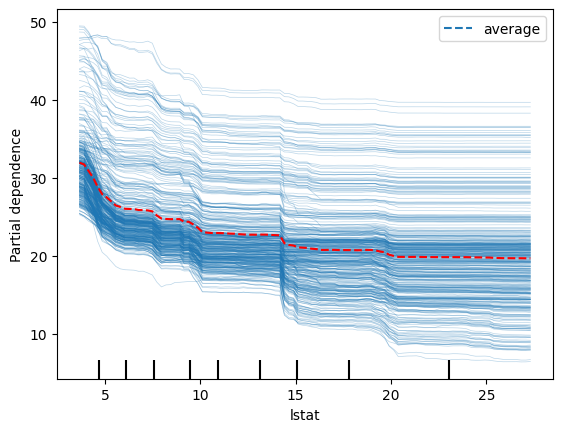

In [ ]:
disp = PartialDependenceDisplay.from_estimator(rf, X_train, ['lstat'], kind='both')

# Access the line representing the average PDP (it's typically the last Line2D object)
# and change its color manually
for ax in disp.axes_.ravel():
    lines = ax.get_lines()
    if lines:  # In case the axis has line objects
        # The last line is usually the average PDP
        pdp_line = lines[-1]
        pdp_line.set_color("red")  # Change to any color you like

plt.show()

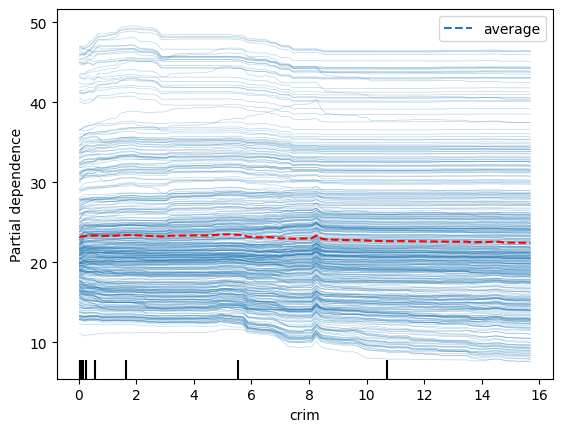

In [ ]:
disp = PartialDependenceDisplay.from_estimator(rf, X_train, ['crim'], kind='both')

# Access the line representing the average PDP (it's typically the last Line2D object)
# and change its color manually
for ax in disp.axes_.ravel():
    lines = ax.get_lines()
    if lines:  # In case the axis has line objects
        # The last line is usually the average PDP
        pdp_line = lines[-1]
        pdp_line.set_color("red")  # Change to any color you like

plt.show()

# Gradient Boosting

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


<Figure size 1000x800 with 0 Axes>

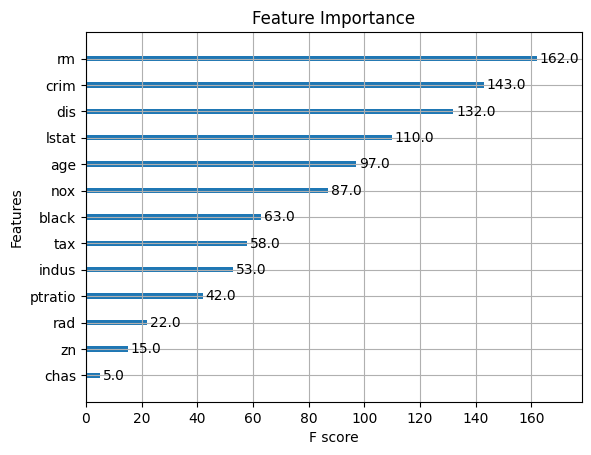

Test MSE: 8.542297394900933
Best parameters: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 160, 'subsample': 1}


In [ ]:
# Define the grid of hyperparameters
param_grid = {
    "n_estimators": list(range(20, 201, 20)),  # nrounds: 20, 40, ..., 200
    "learning_rate": [0.025, 0.05, 0.1, 0.3],  # eta
    "gamma": [0],                              # gamma
    "max_depth": [1, 2, 3, 4],
    "colsample_bytree": [1],
    "min_child_weight": [1],
    "subsample": [1]
}

# Initialize the XGBRegressor with the regression objective and fixed random state for reproducibility
xgb_reg = XGBRegressor(objective="reg:squarederror", random_state=1937, verbosity=1)

# Set up GridSearchCV with 10-fold cross-validation; scoring is negative MSE
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=10,
    verbose=1  # Adjust verbosity as needed
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Train the final model using the best parameters (grid_search.best_estimator_ is already refit on entire data)
final_model = grid_search.best_estimator_

# Plot variable importance using XGBoost's plot_importance function
plt.figure(figsize=(10, 8))
plot_importance(final_model)
plt.title("Variable Importance")
plt.show()

# Calculate MSE on the test data
y_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

# Print the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best parameters:", best_params)